In [1]:
import matplotlib
#matplotlib.use('Agg')
path_data = '../../../../data/'

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [3]:
def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [4]:
def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    #return attributes.apply(distance_from_point)
    return attributes.map(distance_from_point)     #--- check map function

In [5]:
def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    #return training.with_column('Distance', all_distances(training, point))
    training['Distance'] = all_distances(training, point)
    return training

In [6]:
def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort_values(by=['Distance'])
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [7]:
ckd1 = pd.read_csv(path_data + 'ckd.csv')
ckd1.rename(columns={'Blood Glucose Random':'Glucose'}, inplace=True)
ckd1

Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0     48              70             1.005        4      0          normal   
1     53              90             1.020        2      0        abnormal   
2     63              70             1.010        3      0        abnormal   
3     68              80             1.010        3      2          normal   
4     61              80             1.015        2      0        abnormal   
..   ...             ...               ...      ...    ...             ...   
153   55              80             1.020        0      0          normal   
154   42              70             1.025        0      0          normal   
155   12              80             1.020        0      0          normal   
156   17              60             1.025        0      0          normal   
157   58              80             1.025        0      0          normal   

     Pus Cell Pus Cell clumps    Bacteria  Glucose  ...  Packed Cell Volume  \
0    abnormal         present  notpresent      117  ...                  32   
1    abnormal         present  notpresent       70  ...                  29   
2    abnormal         present  notpresent      380  ...                  32   
3    abnormal         present     present      157  ...                  16   
4    abnormal      notpresent  notpresent      173  ...                  24   
..        ...             ...         ...      ...  ...                 ...   
153    normal      notpresent  notpresent      140  ...                  47   
154    normal      notpresent  notpresent       75  ...                  54   
155    normal      notpresent  notpresent      100  ...                  49   
156    normal      notpresent  notpresent      114  ...                  51   
157    normal      notpresent  notpresent      131  ...                  53   

     White Blood Cell Count  Red Blood Cell Count  Hypertension  \
0                      6700                   3.9           yes   
1                     12100                   3.7           yes   
2                      4500                   3.8           yes   
3                     11000                   2.6           yes   
4                      9200                   3.2           yes   
..                      ...                   ...           ...   
153                    6700                   4.9            no   
154                    7800                   6.2            no   
155                    6600                   5.4            no   
156                    7200                   5.9            no   
157                    6800                   6.1            no   

     Diabetes Mellitus  Coronary Artery Disease  Appetite  Pedal Edema Anemia  \
0                   no                       no      poor          yes    yes   
1                  yes                       no      poor           no    yes   
2                  yes                       no      poor          yes     no   
3                  yes                      yes      poor          yes     no   
4                  yes                      yes      poor          yes    yes   
..                 ...                      ...       ...          ...    ...   
153                 no                       no      good           no     no   
154                 no                       no      good           no     no   
155                 no                       no      good           no     no   
156                 no                       no      good           no     no   
157                 no                       no      good           no     no   

    Class  
0       1  
1       1  
2       1  
3       1  
4       1  
..    ...  
153     0  
154     0  
155     0  
156     0  
157     0  

[158 rows x 25 columns]

In [8]:
ckd = pd.DataFrame({'Hemoglobin':standard_units(ckd1['Hemoglobin']), 
                       'Glucose':standard_units(ckd1['Glucose']), 
                       'White Blood Cell Count':standard_units(ckd1['White Blood Cell Count']), 
                       'Class':ckd1['Class'].astype(str)})

#type(ckd_su['Class'][0])

ckd

Hemoglobin   Glucose  White Blood Cell Count Class
0     -0.865744 -0.221549               -0.569768     1
1     -1.457446 -0.947597                1.162684     1
2     -1.004968  3.841231               -1.275582     1
3     -2.814879  0.396364                0.809777     1
4     -2.083954  0.643529                0.232293     1
..          ...       ...                     ...   ...
153    0.700526  0.133751               -0.569768     0
154    0.978974 -0.870358               -0.216861     0
155    0.735332 -0.484162               -0.601850     0
156    0.178436 -0.267893               -0.409356     0
157    0.735332 -0.005280               -0.537686     0

[158 rows x 4 columns]

In [9]:
color_table = pd.DataFrame(
    {'Class':np.array([1, 0]),
    'Color':np.array(['darkblue', 'gold'])}, index=np.array([1,0]))
     
color_table['Class'] = color_table['Class'].astype(str)

ckd = pd.merge(ckd, color_table, on='Class')

class_1 = ckd['Class']

ckd.pop('Class')

ckd.insert(0, 'Class', class_1)



In [10]:
ckd

Class  Hemoglobin   Glucose  White Blood Cell Count     Color
0       1   -0.865744 -0.221549               -0.569768  darkblue
1       1   -1.457446 -0.947597                1.162684  darkblue
2       1   -1.004968  3.841231               -1.275582  darkblue
3       1   -2.814879  0.396364                0.809777  darkblue
4       1   -2.083954  0.643529                0.232293  darkblue
..    ...         ...       ...                     ...       ...
153     0    0.700526  0.133751               -0.569768      gold
154     0    0.978974 -0.870358               -0.216861      gold
155     0    0.735332 -0.484162               -0.601850      gold
156     0    0.178436 -0.267893               -0.409356      gold
157     0    0.735332 -0.005280               -0.537686      gold

[158 rows x 5 columns]

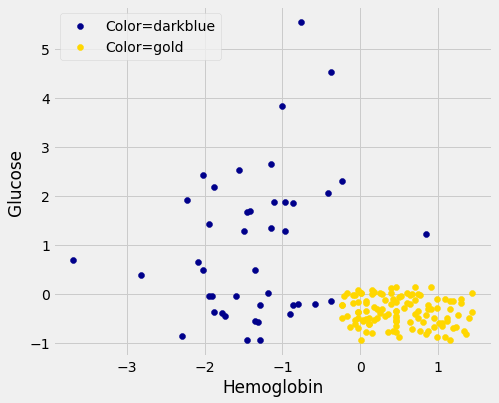

In [11]:
glucose_color_darkblue = ckd[ckd['Color'] == 'darkblue']
glucose_color_gold = ckd[ckd['Color'] == 'gold']


fig, ax = plt.subplots(figsize=(7,6))

ax.scatter(glucose_color_darkblue['Hemoglobin'], 
           glucose_color_darkblue['Glucose'],  
           label='Color=darkblue', 
           color='darkblue')

ax.scatter(glucose_color_gold['Hemoglobin'], 
           glucose_color_gold['Glucose'],  
           label='Color=gold', 
           color='gold')

x_label = 'Hemoglobin'

y_label = 'Glucose'

y_vals = ax.get_yticks()

plt.ylabel(y_label)

ax.legend(loc='upper left')

plt.xlabel(x_label)

plt.show()

In [12]:
HemoG1 = ckd.drop(columns=['White Blood Cell Count'])

In [13]:
HemoG1

Class  Hemoglobin   Glucose     Color
0       1   -0.865744 -0.221549  darkblue
1       1   -1.457446 -0.947597  darkblue
2       1   -1.004968  3.841231  darkblue
3       1   -2.814879  0.396364  darkblue
4       1   -2.083954  0.643529  darkblue
..    ...         ...       ...       ...
153     0    0.700526  0.133751      gold
154     0    0.978974 -0.870358      gold
155     0    0.735332 -0.484162      gold
156     0    0.178436 -0.267893      gold
157     0    0.735332 -0.005280      gold

[158 rows x 4 columns]

### step by step

In [1]:
training = HemoG1
point1 = point[0]
point2 = point[1]
point = np.array([0, 1.5])

def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

np.sqrt(np.sum((point1 - point2)**2))

NameError: name 'HemoG1' is not defined

In [2]:
training1 = HemoG1.drop(columns=['Class', 'Color'])
#training1

#train = np.array([training[:,1], training[:,2]])

#point1 = np.array([0, 1.5])

#train = []

#for i in range(len(training)):
    #j = training['Hemoglobin'].iloc[i]
    #k = training['Glucose'].iloc[i]
    #print(j,k)
    #train.append([j, k])
    #i += 1

#train

#point1 = np.array([0, 1.5])

point2 = np.array(training)

#point2 = np.array([training])

#np.sqrt(np.sum((point1 - point2)**2))

#len(point2)

point2

train = []
n=0

def all_distances(training, point):
    attributes = trainin-g
    def distance_from_point(row):
        return distance(point, np.array(row))
    
    return np.array(attributes.apply(distance_from_point, axis=1))

#distance_from_point(point2)

all_distances(training1, point)

#df['add'] = df.apply(np.sum, axis = 1)

NameError: name 'HemoG1' is not defined

In [3]:
#training

In [99]:
training = HemoG1
point = np.array([0, 1.5])
#point1 = point[0]
#point2 = point[1]

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop(columns=['Class', 'Color'])

    def distance_from_point(row=attributes):
        return distance(point, np.array(row))
#return attributes.apply(distance_from_point)

    return attributes.map(distance_from_point)

all_distances(training, point)


AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
training = HemoG1
point = np.array([0, 1.5])

#def table_with_distances(training, point):
"""A copy of the training table with the distance from each row to array p."""
#return training.with_column('Distance', all_distances(training, point))
training['Distance'] = all_distances(training, point)
return training

In [ ]:
training = HemoG1
point = np.array([0, 1.5])
k = 1

#def closest(training, point, k):
"""A table containing the k closest rows in the training table to array p."""

with_dists = table_with_distances(training, point)

sorted_by_distance = with_dists.sort_values(by=['Distance'])
topk = sorted_by_distance.take(np.arange(k))
topk

In [ ]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoG2 = ckd.copy()
    HemoG1 = HemoG2.drop(columns=['White Blood Cell Count'])
    
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    
    ckd.scatter('Hemoglobin', 'Glucose', group='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(np.array([point.item(0), x_closest]), np.array([point.item(1), y_closest]), color='k', lw=2)

In [ ]:
alice = np.array([0, 1.5])
show_closest(alice)